In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


file_paths = ['/content/column_3C.csv', '/content/derm.csv']

# Prompt the user to choose a file
print('Please choose a dataset to load:')
for i, file_path in enumerate(file_paths):
    print(f'{i+1}. {file_path}')

selection = int(input()) - 1
selected_file_path = file_paths[selection]


df = pd.read_csv(selected_file_path, delimiter=',')

Please choose a dataset to load:
1. /content/column_3C.csv
2. /content/derm.csv
2


**Execute o código abaixo caso escolha o dataset coluna vertebral**

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the activation function (step function)
def step_function(x):
    return np.where(x > 0, 1, 0)

# Separate input and output data
X = df.iloc[:, :-1].values  # get all columns except the last one as features
y = df.iloc[:, -1].values  # get the last column as target variable

# Standardizing the features
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

# One-hot encoding the target variable
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# Define the number of inputs and outputs of the perceptron
n_inputs = X.shape[1]
n_outputs = y_onehot.shape[1]

# Define the initial weights of the perceptron
weights = np.random.rand(n_inputs, n_outputs)

# Define the learning rate and the number of training epochs
learning_rate = 0.01
n_epochs = 100

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

# Train the perceptron
for epoch in range(n_epochs):
    # Make predictions for each input in the training set
    total_error = 0
    for i in range(len(X_train)):
        x = X_train[i]

        # Calculate the output of the perceptron
        net = np.dot(x, weights)
        output = step_function(net)

        # Calculate the error and update the weights
        error = y_train[i] - output
        weights += learning_rate * np.outer(x, error)
        total_error += np.sum(error)

    # Print the average error for the training set for this epoch
    avg_error = total_error / len(X_train)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {avg_error:.4f}")

train_accs = []
test_accs = []
train_cms = []
test_cms = []

for iteration in range(50):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

    y_train_pred = []
    for i in range(len(X_train)):
        x = X_train[i]
        net = np.dot(x, weights)
        output = step_function(net)
        y_train_pred.append(np.argmax(output))

    # Calculate the accuracy of the model for the training set
    train_acc = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
    train_accs.append(train_acc)

    # Calculate the confusion matrix for the training set
    train_cm = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred)
    train_cms.append(train_cm)

    # Make predictions for the test data
    y_test_pred = []
    for i in range(len(X_test)):
        x = X_test[i]
        net = np.dot(x, weights)
        output = step_function(net)
        y_test_pred.append(np.argmax(output))

    # Calculate the accuracy of the model for the test set
    test_acc = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
    test_accs.append(test_acc)

    # Calcula a matriz de confusão para o conjunto de teste
    test_cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)
    test_cms.append(test_cm)

Epoch 0: Train Loss = -1.6089
Epoch 10: Train Loss = 0.0363
Epoch 20: Train Loss = 0.0282
Epoch 30: Train Loss = 0.0161
Epoch 40: Train Loss = -0.0040
Epoch 50: Train Loss = 0.0000
Epoch 60: Train Loss = -0.0040
Epoch 70: Train Loss = -0.0040
Epoch 80: Train Loss = -0.0121
Epoch 90: Train Loss = -0.0081


In [ ]:
y_onehot

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

**Execute o código abaixo caso escolha o dataset dermatologia**



In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the activation function (step function)
def step_function(x):
    return np.where(x > 0, 1, 0)

# Drop na values
df = df.dropna(subset=['age'])

# Separate input and output data
X = df.iloc[:, :-1].values  # get all columns except the last one as features
y = df.iloc[:, -1].values  # get the last column as target variable

# Standardizing the features
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

# One-hot encoding the target variable
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# Define the number of inputs and outputs of the perceptron
n_inputs = X.shape[1]
n_outputs = y_onehot.shape[1]

# Define the initial weights of the perceptron
weights = np.random.rand(n_inputs, n_outputs)

# Define the learning rate and the number of training epochs
learning_rate = 0.01
n_epochs = 100

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

# Train the perceptron
for epoch in range(n_epochs):
    # Make predictions for each input in the training set
    total_error = 0
    for i in range(len(X_train)):
        x = X_train[i]

        # Calculate the output of the perceptron
        net = np.dot(x, weights)
        output = step_function(net)

        # Calculate the error and update the weights
        error = y_train[i] - output
        weights += learning_rate * np.outer(x, error)
        total_error += np.sum(error)

    # Print the average error for the training set for this epoch
    avg_error = total_error / len(X_train)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {avg_error:.4f}")

train_accs = []
test_accs = []
train_cms = []
test_cms = []

for iteration in range(50):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

    y_train_pred = []
    for i in range(len(X_train)):
        x = X_train[i]
        net = np.dot(x, weights)
        output = step_function(net)
        y_train_pred.append(np.argmax(output))

    # Calculate the accuracy of the model for the training set
    train_acc = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
    train_accs.append(train_acc)

    # Calculate the confusion matrix for the training set
    train_cm = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred)
    train_cms.append(train_cm)

    # Make predictions for the test data
    y_test_pred = []
    for i in range(len(X_test)):
        x = X_test[i]
        net = np.dot(x, weights)
        output = step_function(net)
        y_test_pred.append(np.argmax(output))

    # Calculate the accuracy of the model for the test set
    test_acc = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
    test_accs.append(test_acc)

    # Calcula a matriz de confusão para o conjunto de teste
    test_cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)
    test_cms.append(test_cm)

Epoch 0: Train Loss = -2.7168
Epoch 10: Train Loss = -0.0070
Epoch 20: Train Loss = -0.0035
Epoch 30: Train Loss = -0.0070
Epoch 40: Train Loss = -0.0070
Epoch 50: Train Loss = -0.0035
Epoch 60: Train Loss = -0.0035
Epoch 70: Train Loss = 0.0035
Epoch 80: Train Loss = 0.0000
Epoch 90: Train Loss = 0.0000


In [ ]:
cm_train_sum = np.sum(train_cms, axis=0)
cm_test_sum = np.sum(test_cms, axis=0)

**Avaliar resultados de accuracia**

In [ ]:
accuracy_mean_train = np.mean(train_accs)
accuracy_mean_test = np.mean(test_accs)
accuracy_std_train = np.std(train_accs)
accuracy_std_test = np.std(test_accs)


df_results = pd.DataFrame({
      'Accuracy Mean': [accuracy_mean_train, accuracy_mean_test],
      'Accuracy Std': [accuracy_std_train, accuracy_std_test]
}, index=['Train', 'Test'])

df_results

,Accuracy Mean,Accuracy Std
Train,0.972797,0.004383
Test,0.969167,0.017412


**Matriz de confusão coluna vertebral**

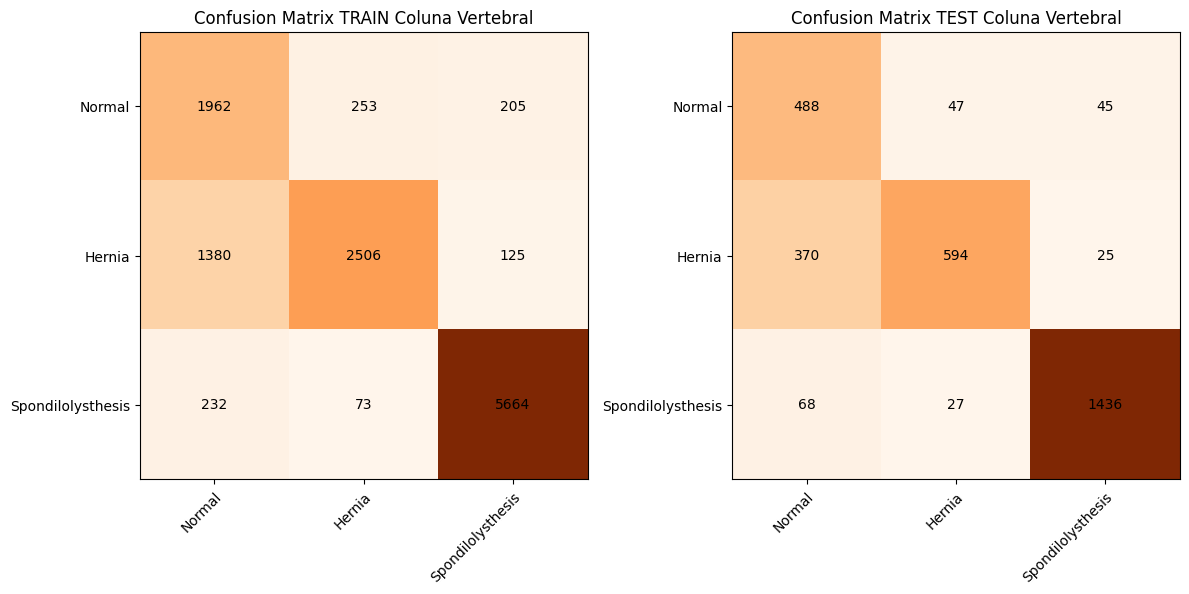

In [ ]:
target_names = ['Normal', 'Hernia', 'Spondilolysthesis']


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Plot train confusion matrix
im = ax[0].imshow(cm_train_sum, cmap='Oranges')
ax[0].set_xticks(np.arange(len(target_names)))
ax[0].set_yticks(np.arange(len(target_names)))
ax[0].set_xticklabels(target_names)
ax[0].set_yticklabels(target_names)
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[0].text(j, i, cm_train_sum[i, j], ha="center", va="center", color="black")
ax[0].set_title("Confusion Matrix TRAIN Coluna Vertebral")

  # Plot test confusion matrix
im = ax[1].imshow(cm_test_sum, cmap='Oranges')
ax[1].set_xticks(np.arange(len(target_names)))
ax[1].set_yticks(np.arange(len(target_names)))
ax[1].set_xticklabels(target_names)
ax[1].set_yticklabels(target_names)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[1].text(j, i, cm_test_sum[i, j], ha="center", va="center", color="black")
ax[1].set_title("Confusion Matrix TEST Coluna Vertebral")

  # Add a colorbar for the two subplots

fig.tight_layout()
plt.show()

**Matriz de confusão dermatologia**


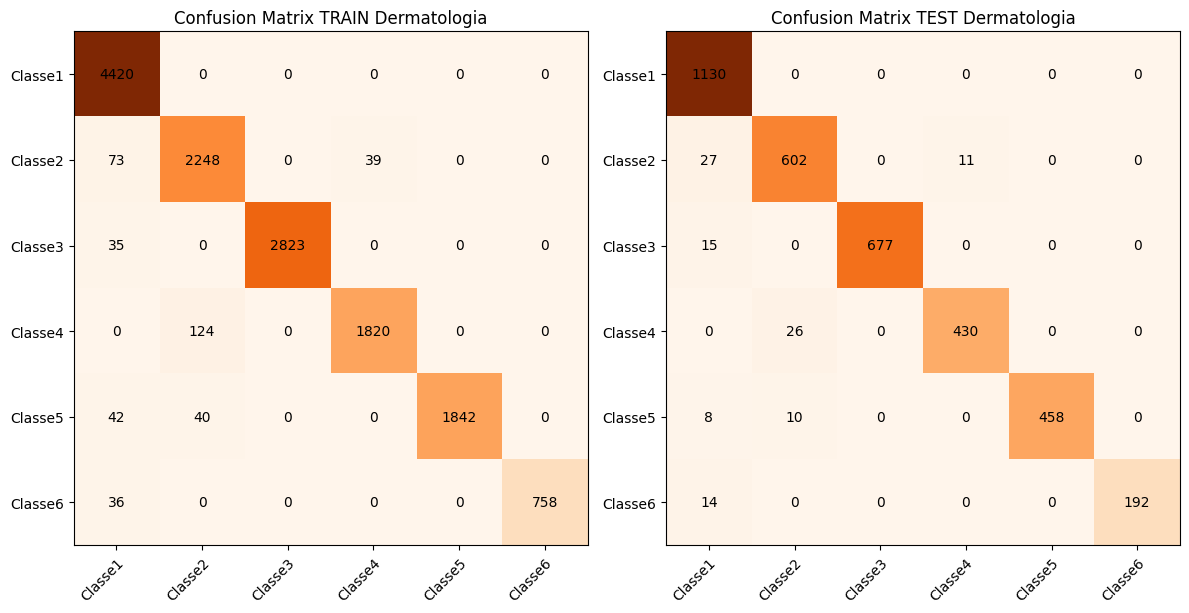

In [ ]:
target_names = ['Classe1','Classe2','Classe3','Classe4','Classe5','Classe6']


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Plot train confusion matrix
im = ax[0].imshow(cm_train_sum, cmap='Oranges')
ax[0].set_xticks(np.arange(len(target_names)))
ax[0].set_yticks(np.arange(len(target_names)))
ax[0].set_xticklabels(target_names)
ax[0].set_yticklabels(target_names)
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[0].text(j, i, cm_train_sum[i, j], ha="center", va="center", color="black")
ax[0].set_title("Confusion Matrix TRAIN Dermatologia")

  # Plot test confusion matrix
im = ax[1].imshow(cm_test_sum, cmap='Oranges')
ax[1].set_xticks(np.arange(len(target_names)))
ax[1].set_yticks(np.arange(len(target_names)))
ax[1].set_xticklabels(target_names)
ax[1].set_yticklabels(target_names)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[1].text(j, i, cm_test_sum[i, j], ha="center", va="center", color="black")
ax[1].set_title("Confusion Matrix TEST Dermatologia")

  # Add a colorbar for the two subplots

fig.tight_layout()
plt.show()